In [1]:
# Install rdkit
!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol_molecule = Chem.MolFromSmiles(paracetamol_smiles)

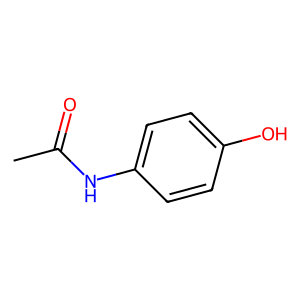

In [3]:
Draw.MolToImage(paracetamol_molecule)

In [4]:
num_atoms = paracetamol_molecule.GetNumAtoms()
print("Number of atoms:", num_atoms)


Number of atoms: 11


In [5]:
atoms = [atom.GetSymbol() for atom in paracetamol_molecule.GetAtoms()]
print("List of atoms:", atoms)

List of atoms: ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']


In [6]:
num_bonds = paracetamol_molecule.GetNumBonds()
print("Number of bonds:", num_bonds)

Number of bonds: 11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem

sdf_file_path = "DB.sdf"

In [8]:
sdf_supplier = Chem.SDMolSupplier(sdf_file_path)

In [9]:
morphine_molecule = None
for mol in sdf_supplier:
    if mol is not None:
        morphine_molecule = mol
        break

In [10]:
if morphine_molecule is not None:
    # Compute the fingerprint as a bit vector
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(morphine_molecule, 2)  # Morgan fingerprint with radius 2
    print("Fingerprint as a bit vector:", fingerprint)
else:
    print("Morphine molecule not found in the SDF file.")

Fingerprint as a bit vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f4147f8e8f0>


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

paracetamol_smiles = "CC(=O)OC1=CC=CC=C1C(O)=O"

In [12]:
def compute_fingerprint(smiles, nBits=1024):
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=nBits)
        fingerprint_np = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fingerprint, fingerprint_np)
        return fingerprint_np, fingerprint
    else:
        return None

In [13]:
paracetamol_fingerprint, paracetamol = compute_fingerprint(paracetamol_smiles)
if paracetamol_fingerprint is not None:
    nonzero_elements_paracetamol = np.nonzero(paracetamol_fingerprint)
    print("Nonzero elements of Paracetamol's fingerprint:", nonzero_elements_paracetamol)

Nonzero elements of Paracetamol's fingerprint: (array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017]),)


In [14]:
aspirin_smiles = "CC(=O)NC1=CC=C(O)C=C1"

aspirin_fingerprint, aspirin = compute_fingerprint(aspirin_smiles)
if aspirin_fingerprint is not None:
    nonzero_elements_aspirin = np.nonzero(aspirin_fingerprint)
    print("Nonzero elements of Aspirin's fingerprint:", nonzero_elements_aspirin)

Nonzero elements of Aspirin's fingerprint: (array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)


In [15]:
print(type(paracetamol))


<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>


In [16]:
if paracetamol_fingerprint is not None and aspirin_fingerprint is not None:
    dice_similarity = DataStructs.DiceSimilarity(paracetamol, aspirin)
    
    print("Dice Similarity between Paracetamol and Aspirin:", dice_similarity)
else:
    print("Fingerprints could not be computed for one or both molecules.")

Dice Similarity between Paracetamol and Aspirin: 0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [17]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

In [18]:
paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"

paracetamol_molecule = Chem.MolFromSmiles(paracetamol_smiles)

if paracetamol_molecule is not None:
    descriptor_names = ["MolLogP", "TPSA", "MolMR", "NumHDonors", "NumHAcceptors"]

    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

    descriptors = calculator.CalcDescriptors(paracetamol_molecule)

    for name, value in zip(descriptor_names, descriptors):
        print(f"{name}: {value}")
else:
    print("Paracetamol molecule not valid.")

MolLogP: 1.3505999999999998
TPSA: 49.33
MolMR: 42.41050000000002
NumHDonors: 2
NumHAcceptors: 2


## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

Molecules containing pattern CCC:


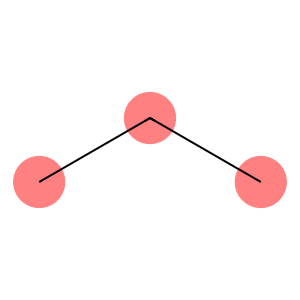

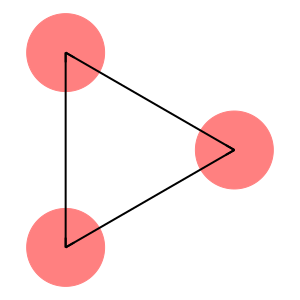

Molecules containing pattern C(=O)N:


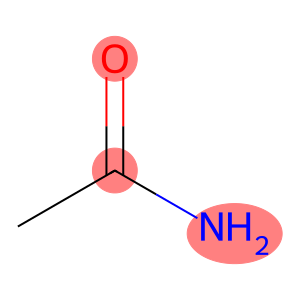

In [19]:
from rdkit import Chem

# Define the list of SMILES strings
smiles_list = [
    "CCO",
    "CCC",
    "CCNC",
    "CC(=O)N",
    "C1CC1",
]

# Define the SMARTS patterns
smarts_pattern1 = "CCC"
smarts_pattern2 = "C(=O)N"

# Create a list to store the molecules that match the patterns
matched_molecules_pattern1 = []
matched_molecules_pattern2 = []

# Iterate through the SMILES list and check for matching patterns
for smiles in smiles_list:
    molecule = Chem.MolFromSmiles(smiles)
    
    if molecule:
        # Check for pattern 1 (CCC)
        if molecule.HasSubstructMatch(Chem.MolFromSmarts(smarts_pattern1)):
            matched_molecules_pattern1.append(molecule)
        
        # Check for pattern 2 (C(=O)N)
        if molecule.HasSubstructMatch(Chem.MolFromSmarts(smarts_pattern2)):
            matched_molecules_pattern2.append(molecule)

# Function to highlight the matched substructure
def highlight_matched_substructure(molecule, match):
    return Chem.Draw.MolToImage(molecule, size=(300, 300), wedgeBonds=True, kekulize=True, highlightAtoms=match)

# Print the molecules containing pattern 1 (CCC)
print("Molecules containing pattern CCC:")
for molecule in matched_molecules_pattern1:
    match = molecule.GetSubstructMatch(Chem.MolFromSmarts(smarts_pattern1))
    display(highlight_matched_substructure(molecule, match))

# Print the molecules containing pattern 2 (C(=O)N)
print("Molecules containing pattern C(=O)N:")
for molecule in matched_molecules_pattern2:
    match = molecule.GetSubstructMatch(Chem.MolFromSmarts(smarts_pattern2))
    display(highlight_matched_substructure(molecule, match))

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [20]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-26 02:11:05--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 1376487 (1,3M) [text/plain]
Saving to: ‘solubility.train.sdf.5’

solubility.train.sd 100%[===================>]   1,31M  2,59MB/s    in 0,5s    

2023-09-26 02:11:06 (2,59 MB/s) - ‘solubility.train.sdf.5’ saved [1376487/1376487]



In [21]:
import pandas as pd

path = "solubility.train.sdf"

supplier = Chem.SDMolSupplier(path, removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]

In [22]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

def calculate_descriptors(mol):
    desc_list = [i[0] for i in Descriptors._descList]
    calcul = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
    return calcul.CalcDescriptors(mol)

In [23]:
df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list], columns=[x[0] for x in Descriptors._descList])
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]

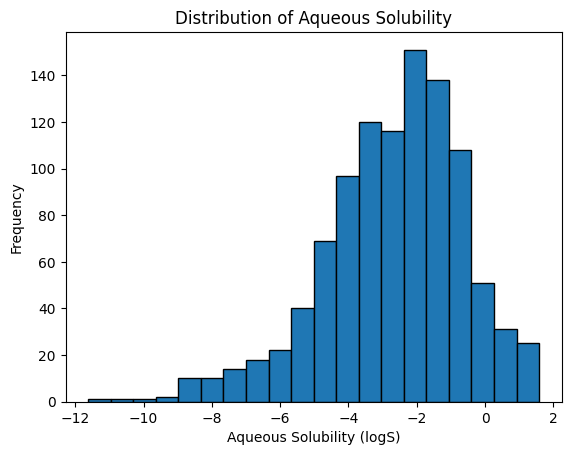

In [25]:
import matplotlib.pyplot as plt

plt.hist(labels, bins=20, edgecolor='k')
plt.xlabel('Aqueous Solubility (logS)')
plt.ylabel('Frequency')
plt.title('Distribution of Aqueous Solubility')
plt.show()

On peut voir que l'on a les fréquences sont bien correlé à la solubilité aqueuse et qu'on obtient la plus haute fréquence à logS = -2. 

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [27]:
nan_rows = df[df.isnull().any(axis=1)]
print("Number of rows containing NaN values:", len(nan_rows))

Number of rows containing NaN values: 1


In [28]:
df.dropna(inplace=True)
labels = labels[:len(df)]

In [29]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.79584544800392


## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [33]:
# 1. Download the file
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-09-26 02:11:11--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 

140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327929 (320K) [text/plain]
Saving to: ‘solubility.test.sdf.2’

solubility.test.sdf 100%[===================>] 320,24K   988KB/s    in 0,3s    

2023-09-26 02:11:12 (988 KB/s) - ‘solubility.test.sdf.2’ saved [327929/327929]



In [34]:
test_mol_supplier = Chem.SDMolSupplier(path, removeHs=False)
list_molecule_test = [mol for mol in test_mol_supplier if mol is not None]


In [35]:
mol_test = list_molecule_test[0]
descriptors = calculate_descriptors(mol_test)

In [36]:
desc_test_scaled = scaler.transform([descriptors])

/home/amine/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [37]:
predicted_logS = model.predict(desc_test_scaled)[0]
real_logS = float(mol_test.GetProp('SOL'))

print(f"Predicted logS: {predicted_logS:.4f}")
print(f"Real logS: {real_logS:.4f}")

Predicted logS: -3.4448
Real logS: -3.1800


/home/amine/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
